<a href="https://colab.research.google.com/github/singhbhaskar360/Python_ML/blob/main/string_date_time_task_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [ ]:
# code here
nft=pd.read_csv('https://tinyurl.com/2pfhncqw')

In [ ]:
nft.head(1)

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.0,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380


In [ ]:
nft.drop_duplicates(inplace=True)
nft.shape

(309910, 26)

In [ ]:
nft.shape

(309910, 26)

In [ ]:
nft.pivot_table(index='verification_status',columns='contract_type',aggfunc={'rarity_score':'mean','last_sale_price':'sum'})
# nft['verification_status'].value_counts()

last_sale_price                rarity_score           
contract_type               default            own      default        own
verification_status                                                       
approved                 658.931935    1684.819488  3296.041909  393.00000
verified                 370.304092  667394.862655   125.845700  260.83758

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [ ]:
# code here
cars=pd.read_csv('https://tinyurl.com/2r24n45l')

In [ ]:
cars['Name'].unique()

In [ ]:
cars['Year']=cars['Year'].apply(lambda x:str(x)[:4])

<Axes: ylabel='Density'>

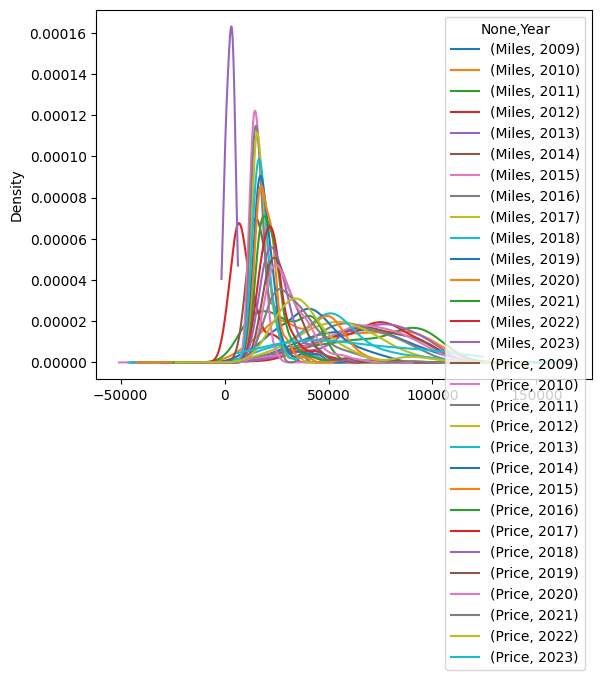

In [ ]:
cars.pivot_table(index='Name',columns='Year', aggfunc={'Price':'mean','Miles':'median'}).plot.kde()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [ ]:
# code here
power=pd.read_csv('https://tinyurl.com/2nq6kugt')

In [ ]:
power.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.0,0.0
1,2017-09-01,Haryana,2720.0,2470.0,0.0,2470.0,0,28,7,-21.8,0.0


In [ ]:
power['Dates']=pd.to_datetime(power['Dates'])

In [ ]:
power['Month']=power['Dates'].dt.month_name()

In [ ]:
power.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Month
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.0,0.0,September
1,2017-09-01,Haryana,2720.0,2470.0,0.0,2470.0,0,28,7,-21.8,0.0,September


In [ ]:
power['Power Station'].value_counts().sort_values(ascending=False).head(10)

NTPC Ltd.    9570
GMR ENERG    5742
NHPC         5742
NPCIL        5742
JSWEL        3828
TATA PCL     3828
IBPIL        3828
APL          3828
JPPVL        3828
NLC          3828
Name: Power Station, dtype: int64

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [73]:
# code here
import pandas as pd
ques_ans=pd.read_csv('/content/question-answer.csv')

In [7]:
ques_ans.head()

,2
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?


In [29]:
ques_ans['type']=ques_ans['2'].apply(lambda x:x[0])
ques_ans.head(2)


,2,type
0,Q1-What is Data Science?,Q
1,"Ans1-Data Science combines statistics, maths, ...",A


In [30]:
ques_ans.head(1)

,2,type
0,Q1-What is Data Science?,Q


In [34]:
ques_ans.set_index('type',inplace=True)

In [37]:
x=ques_ans.T

In [49]:
x.head(2)

type,Q,A,Q,A,Q,A,Q,A,Q,A,Q,A,Q,A,Q,A,Q,A,Q,A
index,,,,,,,,,,,,,,,,,,,,
2,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ...",Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...,Q8-What is a time series?,Ans8-A time series is a set of observations or...,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


In [77]:
ques_ans.rename(columns={'Unnamed: 0':'index','2':'values'},inplace=True)

In [78]:
ques_ans['type']=ques_ans['values'].str.get(0)

In [108]:
ques_ans[::2]['index']=ques_ans[1::2]['index']
#['index']#=ques_ans[1:]

<ipython-input-108-ec29da4f5d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_ans[::2]['index']=ques_ans[1::2]['index']


In [109]:
ques_ans.head(2)

,index,values,type
0,0,Q1-What is Data Science?,Q
1,1,"Ans1-Data Science combines statistics, maths, ...",A


In [113]:
y=ques_ans.pivot(index='index',columns='type')

In [117]:
y.

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64', name='index')

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
# code here

###`Q 6-10` LOG and EMPLOYEE 
6. Show `activity` details month wise. Show count for each `activity` 
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [3]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [4]:
log_file.head(3)

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU


In [5]:
log_file.shape

(365, 6)

In [36]:
employee.head(5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [7]:
employee.shape

(41, 4)

In [8]:
f=log_file.merge(employee,how='left',left_on='emp_id',right_on='EMPLOYEE_ID')[['Log_ID','dt','dept','emp_id','activity','eqpt','FIRST_NAME','LAST_NAME','EMAIL']]

In [9]:
f.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,Alexander,Khoo,AKHOO
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,David,Austin,DAUSTIN
2,1002,2022-01-09,Dept3,112,Inspection,CPU,NaN,Urman,JMURMAN
3,1003,2022-01-10,Dept4,120,Inspection,UPS,Matthew,Weiss,MWEISS
4,1004,2022-01-11,Dept3,138,Checking,Battery,Stephen,Stiles,SSTILES


In [10]:
f['dt']=pd.to_datetime(f['dt'])

In [11]:
f['month']=f['dt'].dt.month_name()

In [22]:
f['day']=f['dt'].dt.day_name()

In [171]:
f.head(1)

,Log_ID,dt,dept,emp_id,activity,eqpt,FIRST_NAME,LAST_NAME,EMAIL,month,day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,Alexander,Khoo,AKHOO,January,Friday


In [12]:
x=f.groupby('month')
# f.groupby(['month','activity']).value_counts()

In [13]:
#6
x['activity'].value_counts()

month      activity  
April      Cleaning      11
           Inspection     9
           Checking       5
           Repair         5
August     Cleaning      10
           Inspection     9
           Checking       8
           Repair         4
December   Inspection    12
           Cleaning       7
           Checking       6
           Repair         6
February   Repair        10
           Checking       7
           Cleaning       7
           Inspection     4
January    Cleaning      10
           Inspection     9
           Checking       7
           Repair         5
July       Inspection    14
           Checking       6
           Cleaning       6
           Repair         5
June       Repair        10
           Inspection     8
           Cleaning       7
           Checking       5
March      Repair        12
           Checking       8
           Cleaning       6
           Inspection     5
May        Repair        11
           Cleaning       8
           Inspection     

In [14]:
y=f[f['month']=="January"].groupby(['month','FIRST_NAME','LAST_NAME'])

In [169]:
#7
y['activity'].value_counts().sort_values(ascending=False).head(5)

month    FIRST_NAME  LAST_NAME  activity  
January  Matthew     Weiss      Inspection    2
         Alexander   Khoo       Cleaning      1
         Lex         De Haan    Checking      1
         Stephen     Stiles     Checking      1
         Shelli      Baida      Repair        1
Name: activity, dtype: int64

In [34]:
f['name']=f['FIRST_NAME'] + f['LAST_NAME']

In [35]:
f

,Log_ID,dt,dept,emp_id,activity,eqpt,FIRST_NAME,LAST_NAME,EMAIL,month,day,name
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,Alexander,Khoo,AKHOO,January,Friday,AlexanderKhoo
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,David,Austin,DAUSTIN,January,Saturday,DavidAustin
2,1002,2022-01-09,Dept3,112,Inspection,CPU,NaN,Urman,JMURMAN,January,Sunday,NaN
3,1003,2022-01-10,Dept4,120,Inspection,UPS,Matthew,Weiss,MWEISS,January,Monday,MatthewWeiss
4,1004,2022-01-11,Dept3,138,Checking,Battery,Stephen,Stiles,SSTILES,January,Tuesday,StephenStiles
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,Payam,Kaufling,PKAUFLING,January,Monday,PayamKaufling
361,1361,2023-01-03,Dept4,116,Checking,Server,Shelli,Baida,SBAIDA,January,Tuesday,ShelliBaida
362,1362,2023-01-04,Dept4,110,Checking,CPU,John,Chen,JCHEN,January,Wednesday,JohnChen
363,1363,2023-01-05,Dept4,102,Inspection,AC,Lex,De Haan,LDEHAAN,January,Thursday,LexDe Haan


In [29]:
#8
f_w=f[(f['day']=="Saturday") | (f['day']=="Sunday")]

In [32]:
w_g=f_w.groupby(['FIRST_NAME','LAST_NAME'])

In [33]:
w_g['FIRST_NAME'].value_counts()

FIRST_NAME  LAST_NAME    FIRST_NAME
Alexander   Hunold       Alexander     3
            Khoo         Alexander     2
Daniel      Faviet       Daniel        5
David       Austin       David         3
Den         Raphaely     Den           4
Diana       Lorentz      Diana         1
Guy         Himuro       Guy           1
Hazel       Philtanker   Hazel         4
Irene       Mikkilineni  Irene         2
Ismael      Sciarra      Ismael        2
James       Landry       James         3
            Marlow       James         2
Jason       Mallin       Jason         3
John        Seo          John          2
Joshua      Patel        Joshua        4
Julia       Nayer        Julia         2
Kevin       Mourgos      Kevin         3
Ki          Gee          Ki            2
Laura       Bissot       Laura         2
Lex         De Haan      Lex           4
Matthew     Weiss        Matthew       4
Michael     Rogers       Michael       3
Mozhe       Atkinson     Mozhe         1
Nancy       Greenberg

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname). 

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [ ]:
# code here